<a href="https://colab.research.google.com/github/worklifesg/Python-for-Computer-Vision-with-OpenCV-and-Deep-Learning/blob/main/5.%20Object%20Detection%20with%20OpenCV%20and%20Python/2_ObjectDetection_OpenCV_CornerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Object Detection with OpenCV and Python 

In this section, we will cover the <b> Corner Detection using Harris Corner Detection and Shi-Tomasi Detection</b>

<b> Corner : </b> It is a point whose local neigbourhood stands in two dominant and different edge directions. Simply it is a junction of 2 edges where edge is a sudden change in image brightness.

Basically here in this section we will discuss 2 types of corner detection algorithms:

- <b> Harris Corner Detection :</b>
 - Published by Chris Harris and Mike Stephens in 1988.
 - <i> Corners can be detected by looking for significant change in all directions</i>
 - Let us take this example:

 ![alt text](https://drive.google.com/uc?id=1obKvBI6BbHoH-tLHUXUp-4tL2NORhhIr)

 - In first image <b> shifting in the window will result in large change in appearance </b>.
 - In second image, where we have <b> flat regions (outside the junction of edges), there are no changes in all directions. </b>
 - In third image <b> edges don't have major change in appearance if window is moving there.</b>
 -Formula for calculating <b> Harris Corner Detection </b>

 \begin{align*}
 f(x,y) = \sum_{(x_k,y_k)\in W}(I(x_k,y_k)-I(x_k+\Delta x,y_k+\Delta y))^2
 \end{align*}

- <b> Shi-Tomasi Corner Detection :</b>
 - Published by J.Shi and C.Tomasi in 1994.
 - <i> Small modification to Harris Corner Detection which ended by with better results.</i>
 - It changed the <b> scoring function selection criteria </b> for corner detection
 - Example, Harris corner detection uses:
 
 \begin{align*}
 R_{\mathrm{Harris}} = \lambda_1\lambda_2-k(\lambda_1+\lambda_2)
 \end{align*}

 - And Shi-Tomasi Corner Detection uses:

 \begin{align*}
 R_{\mathrm{Shi-Tomasi}} = \min(\lambda_1,\lambda_2)
 \end{align*}




In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

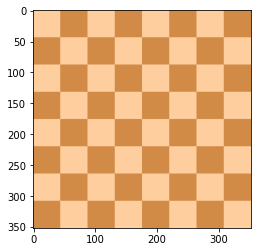

In [2]:
flat_chess = cv2.imread('flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

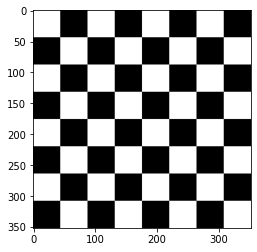

In [3]:
#Load this in gray scale

gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

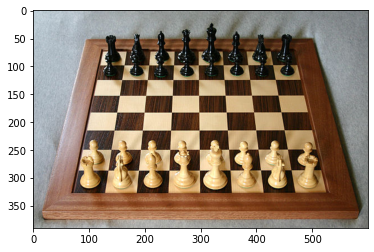

In [4]:
# Uploading real chessboard image

real_chess = cv2.imread('real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

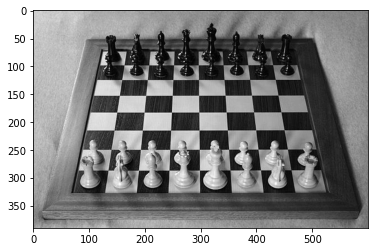

In [5]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

#### Harris Corner Detection

In [6]:
gray = np.float32(gray_flat_chess)
dst = cv2.cornerHarris( src=gray,blockSize=2,ksize=3,k=0.04)

'''
blockSize is the neighbourhood size (corner eigenvalues and vectors)
ksize is the aperture parameter (lernel size) for Sobel operator
k = Harris detector free parameter in formula above
'''

dst = cv2.dilate(dst,None)
#dilate is morphological operator used in erosion

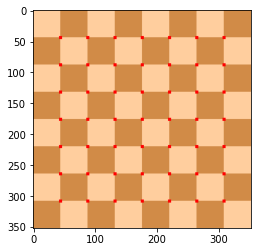

In [7]:
# whatever the result of dst if greater than 1% of max value will be assigned to color red

flat_chess[dst>0.01*dst.max()] = [255,0,0]

plt.imshow(flat_chess) #corners are detected

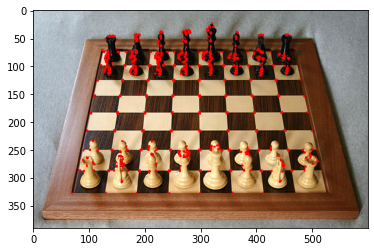

In [8]:
# Now lets try on actual real chessboard

gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst,None)

real_chess[dst>0.01*dst.max()] = [255,0,0]

plt.imshow(real_chess) #corners are detected

In real chess board with pieces, corner are also detected for not only chess board but also for chess pieces


---

#### Shi-Tomasi Corner Detection

In [9]:
#Draw images again as there has been certain modifications using Harris corner detector

flat_chess = cv2.imread('flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

real_chess = cv2.imread('real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

In [10]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,64,0.01,10)

'''
 - max number of corners (best)
 - quality level parameter = paremater*best quality measure for measure = eigenvalue
 - 10 min distance
'''

'\n - max number of corners (best)\n - quality level parameter = paremater*best quality measure for measure = eigenvalue\n - 10 min distance\n'

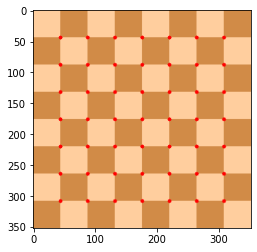

In [11]:
corners = np.int0(corners)

for i in corners:
  x,y = i.ravel()
  cv2.circle(flat_chess,(x,y),3,
             (255,0,0),-1)
plt.imshow(flat_chess)

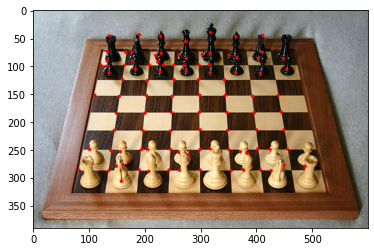

In [12]:
#Real Chess Board
corners = cv2.goodFeaturesToTrack(gray_real_chess,100,0.01,10)

corners = np.int0(corners)

for i in corners:
  x,y = i.ravel()
  cv2.circle(real_chess,(x,y),3,
             (255,0,0),-1)
plt.imshow(real_chess)

Using Shi-Tomasi detection, we can control the number of maximum number of bext corner based on their quality measures